In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

tammi = pd.read_excel("vuosi-2019-autot.xls", header=None, sheet_name=1, skiprows=[0,1])
helmi = pd.read_excel("vuosi-2019-autot.xls", header=None, sheet_name=2, skiprows=[0,1])
maalis = pd.read_excel("vuosi-2019-autot.xls", header=None, sheet_name=3, skiprows=[0,1])
huhti = pd.read_excel("vuosi-2019-autot.xls", header=None, sheet_name=4, skiprows=[0,1])

In [2]:
#2015-2018 henkilöautovero
df = pd.DataFrame()
for i in range(1,13):
    data = pd.read_excel("vuosi-2018_autot.xls", header=None, sheet_name=i, skiprows=[0,1])
    data2 = pd.read_excel("vuosi-2017-autot.xls", header=None, sheet_name=i, skiprows=[0,1])
    data3 = pd.read_excel("vuosi-2016-autot.xls", header=None, sheet_name=i, skiprows=[0,1])
    data4 = pd.read_excel("vuosi-2015_autot.xls", header=None, sheet_name=i, skiprows=[0,1])
    df = df.append(data)
    df = df.append(data2)
    df = df.append(data3)
    df = df.append(data4)

In [3]:
df.columns = ['Merkki', 'Malli', 'Mallin tarkennin', 'Kunto A=Alennettu',
       'Päätöspäivä', 'Käyttöönottopvä', 'Ajokm/1000', 'Verotusarvo',
       'Autovero']
df.head()

Merkki   Malli  Mallin tarkennin Kunto A=Alennettu  Päätöspäivä  \
0  ALFA ROMEO     159      2.2 4D 136KW               NaN     20180125   
1  ALFA ROMEO  Spider  2.0 2D AVO 114KW               NaN     20180109   
2        AUDI      A1    1.2 5D HB 63KW               NaN     20180104   
3        AUDI      A3    1.2 5D HB 81KW               NaN     20180103   
4        AUDI      A3    1.4 3D HB 90KW               NaN     20180108   

   Käyttöönottopvä  Ajokm/1000  Verotusarvo  Autovero  
0         20060929        88.0      4678.00   1220.95  
1         20000629       112.0      4538.00    980.20  
2         20140612        37.0     12940.00   2549.18  
3         20160418        20.0     20442.60   3802.32  
4         20130322        72.0     14827.15   3054.39

In [4]:
tammi.head()

0          1                   2    3         4         5      6  \
0          AC  COBRA 427    7.0 2D AVO 200KW  NaN  20190104  19661231    NaN   
1  ALFA ROMEO     GIULIA     2.1 D AUT 132KW  NaN  20190117  20161215   24.0   
2  ALFA ROMEO        GTV  3.0 2D COUPE 160KW  NaN  20190110  20020326  159.0   
3        AUDI         A1      1.2 5D HB 63KW  NaN  20190124  20130213   37.0   
4        AUDI         A1      1.2 5D HB 63KW  NaN  20190123  20130711   84.0   

         7        8  
0    393.0    70.34  
1  30030.0  5105.10  
2   5708.0  1655.32  
3  11307.0  2227.47  
4   9610.0  1893.17

In [5]:
helmi.head()

0       1                   2   3         4         5      6  \
0  ALFA ROMEO     159  2.0 D 5D STW 125KW NaN  20190212  20110929  161.0   
1  ALFA ROMEO     159  2.4 D 5D STW 147KW NaN  20190221  20060418  223.0   
2  ALFA ROMEO  Giulia  2.1 D 4D AUT 132KW NaN  20190207  20161018   49.0   
3        AUDI      A1      1.0 5D HB 70KW NaN  20190226  20151207   46.0   
4        AUDI      A1      1.2 5D HB 63KW NaN  20190219  20120813  104.0   

          7        8  
0   6083.00  1350.42  
1   2837.80   635.66  
2  28818.75  4899.18  
3  13033.00  2085.28  
4   8264.00  1628.00

In [6]:
maalis.head()

0               1                       2   3         4         5  \
0  ALFA ROMEO             156  1.9 D 5D STW 4WD 110KW NaN  20190301  20050617   
1  ALFA ROMEO             159        2.2 5D STW 136KW NaN  20190318  20070605   
2  ALFA ROMEO           BRERA    2.4 D 3D COUPE 154KW NaN  20190327  20080228   
3  ALFA ROMEO  Brera (159 3d)      2.2 3D COUPE 136KW NaN  20190325  20060131   
4  ALFA ROMEO       GIULIETTA         1.4 5D HB 125KW NaN  20190301  20110823   

       6       7        8  
0  133.0  1129.1   257.43  
1  174.0  3137.4   825.13  
2  159.0  7060.0  1546.14  
3  163.0  7573.0  1976.55  
4  119.0  8422.0  1785.46

In [7]:
huhti.head()

0         1                   2   3         4         5      6  \
0  ALFA ROMEO       159  2.4 D 5D STW 154KW NaN  20190412  20080824  149.0   
1  ALFA ROMEO  2000 GTV         1.9 2D 95KW NaN  20190409  19730823    NaN   
2  ALFA ROMEO    Giulia      2.1 D 4D 110KW NaN  20190429  20170720   30.0   
3  ALFA ROMEO    Giulia  2.1 D 4D AUT 132KW NaN  20190423  20160901   55.0   
4  ALFA ROMEO    Giulia  2.1 D 4D AUT 132KW NaN  20190429  20161111  111.0   

          7        8  
0   4646.00  1026.76  
1    139.00    25.85  
2  26724.95  4275.99  
3  25947.85  4411.13  
4  23444.60  3985.58

In [8]:
v2019 = pd.concat([tammi, helmi, maalis, huhti])
v2019.columns = ['Merkki', 'Malli', 'Mallin tarkennin', 'Kunto A=Alennettu',
       'Päätöspäivä', 'Käyttöönottopvä', 'Ajokm/1000', 'Verotusarvo',
       'Autovero']
v2019.head()

Merkki      Malli    Mallin tarkennin Kunto A=Alennettu  Päätöspäivä  \
0          AC  COBRA 427    7.0 2D AVO 200KW               NaN     20190104   
1  ALFA ROMEO     GIULIA     2.1 D AUT 132KW               NaN     20190117   
2  ALFA ROMEO        GTV  3.0 2D COUPE 160KW               NaN     20190110   
3        AUDI         A1      1.2 5D HB 63KW               NaN     20190124   
4        AUDI         A1      1.2 5D HB 63KW               NaN     20190123   

   Käyttöönottopvä  Ajokm/1000  Verotusarvo  Autovero  
0         19661231         NaN        393.0     70.34  
1         20161215        24.0      30030.0   5105.10  
2         20020326       159.0       5708.0   1655.32  
3         20130213        37.0      11307.0   2227.47  
4         20130711        84.0       9610.0   1893.17

In [9]:
verot = pd.concat([v2019, df])

In [10]:
verot.head()

Merkki      Malli    Mallin tarkennin Kunto A=Alennettu  Päätöspäivä  \
0          AC  COBRA 427    7.0 2D AVO 200KW               NaN     20190104   
1  ALFA ROMEO     GIULIA     2.1 D AUT 132KW               NaN     20190117   
2  ALFA ROMEO        GTV  3.0 2D COUPE 160KW               NaN     20190110   
3        AUDI         A1      1.2 5D HB 63KW               NaN     20190124   
4        AUDI         A1      1.2 5D HB 63KW               NaN     20190123   

   Käyttöönottopvä  Ajokm/1000  Verotusarvo  Autovero  
0         19661231         NaN        393.0     70.34  
1         20161215        24.0      30030.0   5105.10  
2         20020326       159.0       5708.0   1655.32  
3         20130213        37.0      11307.0   2227.47  
4         20130711        84.0       9610.0   1893.17

In [11]:
verot.isna().sum()

Merkki                    0
Malli                     0
Mallin tarkennin         56
Kunto A=Alennettu    124131
Päätöspäivä               0
Käyttöönottopvä           0
Ajokm/1000             4083
Verotusarvo               0
Autovero                  0
dtype: int64

In [12]:
verot.drop("Kunto A=Alennettu",1,inplace=True)

In [13]:
verot.reset_index(drop=True, inplace=True)

In [14]:
verot.Päätöspäivä = pd.to_datetime(verot.Päätöspäivä, format='%Y%m%d')
verot.Käyttöönottopvä = pd.to_datetime(verot.Käyttöönottopvä, format='%Y%m%d')

In [15]:
verot["ika"] = (verot.Päätöspäivä - verot.Käyttöönottopvä).dt.days

In [16]:
verot.head()

Merkki      Malli    Mallin tarkennin Päätöspäivä Käyttöönottopvä  \
0          AC  COBRA 427    7.0 2D AVO 200KW  2019-01-04      1966-12-31   
1  ALFA ROMEO     GIULIA     2.1 D AUT 132KW  2019-01-17      2016-12-15   
2  ALFA ROMEO        GTV  3.0 2D COUPE 160KW  2019-01-10      2002-03-26   
3        AUDI         A1      1.2 5D HB 63KW  2019-01-24      2013-02-13   
4        AUDI         A1      1.2 5D HB 63KW  2019-01-23      2013-07-11   

   Ajokm/1000  Verotusarvo  Autovero    ika  
0         NaN        393.0     70.34  18997  
1        24.0      30030.0   5105.10    763  
2       159.0       5708.0   1655.32   6134  
3        37.0      11307.0   2227.47   2171  
4        84.0       9610.0   1893.17   2022

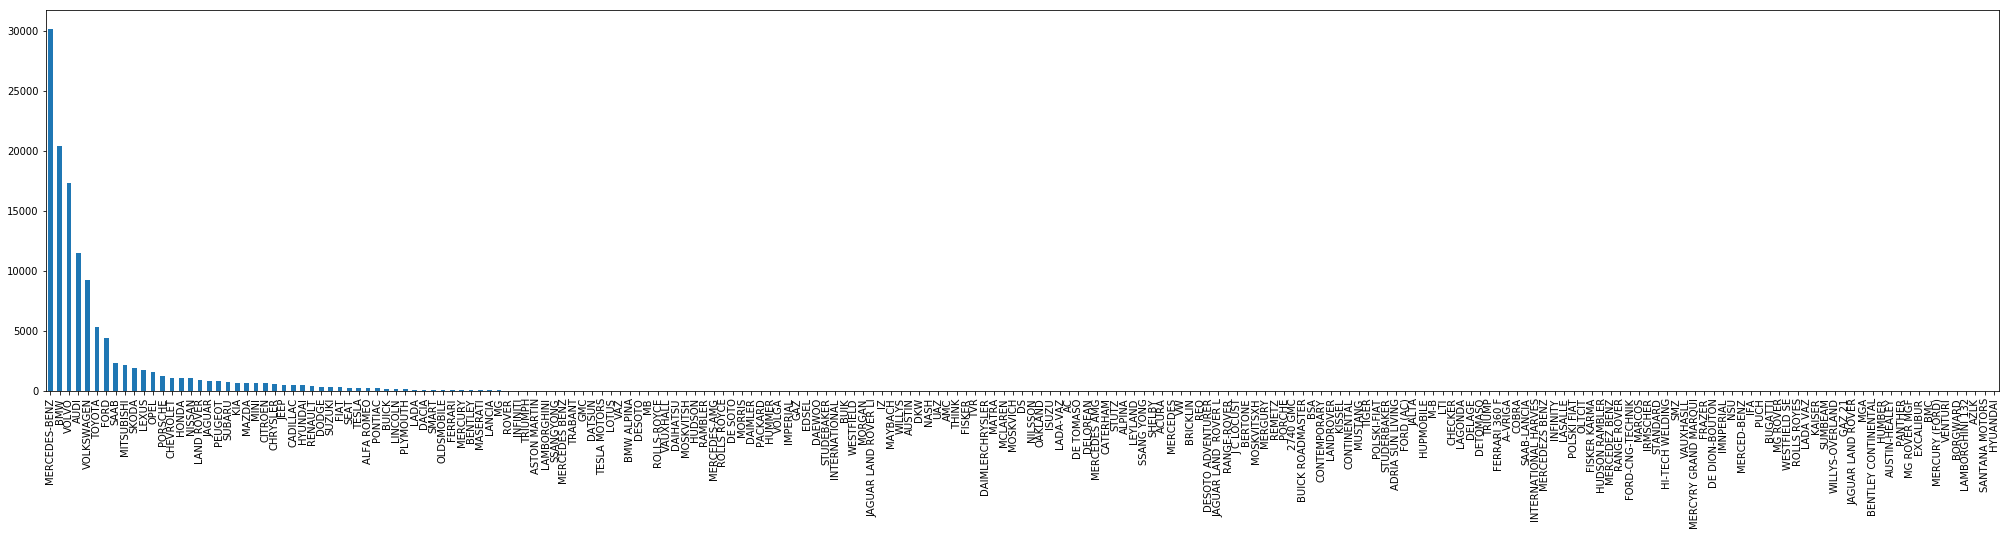

In [17]:
verot.Merkki.value_counts().plot(kind="bar", figsize=(35,7))

In [18]:
new_df = verot[verot.Merkki == "MERCEDES-BENZ"]

In [19]:
new_df.head()

Merkki   Malli   Mallin tarkennin Päätöspäivä Käyttöönottopvä  \
1294  MERCEDES-BENZ     190        2.0 4D 75KW  2019-01-09      1988-05-02   
1295  MERCEDES-BENZ  300 SD  3.0 D 4D AUT 89KW  2019-01-18      1980-04-19   
1296  MERCEDES-BENZ   A 150     1.5 5D HB 70KW  2019-01-09      2007-11-28   
1297  MERCEDES-BENZ   A 180   1.5 D 5D HB 80KW  2019-01-02      2015-07-21   
1298  MERCEDES-BENZ   A 180   1.5 D 5D HB 80KW  2019-01-16      2017-02-01   

      Ajokm/1000  Verotusarvo  Autovero    ika  
1294         NaN       958.00    206.92  11209  
1295         NaN      1135.00    263.32  14153  
1296       137.0      3466.40    675.94   4060  
1297        36.0     18536.90   3132.73   1261  
1298        38.0     20388.45   2956.32    714

In [20]:
new_df.Malli.describe()

count     30207
unique     1440
top       C 220
freq       3531
Name: Malli, dtype: object

In [21]:
new_df.Malli.value_counts().head()

C 220    3531
E 220    2358
C 200    1979
C 180    1548
E 350    1388
Name: Malli, dtype: int64

In [22]:
tuoduin = new_df[new_df["Malli"] == "C 220"]
tuoduin.reset_index(drop=True, inplace=True)
tuoduin.head()

Merkki  Malli        Mallin tarkennin Päätöspäivä Käyttöönottopvä  \
0  MERCEDES-BENZ  C 220  2.1 2D COUPE AUT 125KW  2019-01-29      2012-08-30   
1  MERCEDES-BENZ  C 220    2.1 5D STW AUT 125KW  2019-01-21      2011-09-21   
2  MERCEDES-BENZ  C 220    2.1 5D STW AUT 125KW  2019-01-29      2011-10-31   
3  MERCEDES-BENZ  C 220    2.1 5D STW AUT 125KW  2019-01-16      2015-02-09   
4  MERCEDES-BENZ  C 220    2.1 5D STW AUT 125KW  2019-01-28      2015-03-26   

   Ajokm/1000  Verotusarvo  Autovero   ika  
0        51.0     21385.95   4597.97  2343  
1        72.0     17186.00   3694.99  2679  
2       179.0     13318.00   2863.37  2647  
3       198.0     19691.15   3761.00  1437  
4       121.0     23227.05   4622.18  1404

In [23]:
tuoduin.isna().sum()

Merkki              0
Malli               0
Mallin tarkennin    0
Päätöspäivä         0
Käyttöönottopvä     0
Ajokm/1000          0
Verotusarvo         0
Autovero            0
ika                 0
dtype: int64

In [24]:
tuoduin.dtypes

Merkki                      object
Malli                       object
Mallin tarkennin            object
Päätöspäivä         datetime64[ns]
Käyttöönottopvä     datetime64[ns]
Ajokm/1000                 float64
Verotusarvo                float64
Autovero                   float64
ika                          int64
dtype: object

In [25]:
tuoduin["Ajokm/1000"] = tuoduin["Ajokm/1000"].astype(int)

/home/h8953/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
tuoduin.dtypes

Merkki                      object
Malli                       object
Mallin tarkennin            object
Päätöspäivä         datetime64[ns]
Käyttöönottopvä     datetime64[ns]
Ajokm/1000                   int64
Verotusarvo                float64
Autovero                   float64
ika                          int64
dtype: object

In [27]:
tuoduin["Mallin tarkennin"].value_counts().head()

2.1 D 5D STW AUT 125KW        2143
2.1 D 4D AUT 125KW             499
2.1 D 5D STW 125KW             194
2.1 D 5D STW 4WD AUT 125KW     165
2.1 D 5D STW AUT 110KW          95
Name: Mallin tarkennin, dtype: int64

In [28]:
tuoduin_malli_tarkennin = new_df[new_df["Mallin tarkennin"] == "2.1 D 5D STW AUT 125KW"]

In [29]:
dummies_for_machine_learning = pd.get_dummies(tuoduin["Mallin tarkennin"], drop_first=True)

In [30]:
dflin = pd.concat([tuoduin["Ajokm/1000"], tuoduin["Verotusarvo"], tuoduin["Autovero"], tuoduin["ika"], dummies_for_machine_learning],axis=1)

In [31]:
dflin.reset_index(drop=True, inplace=True)
dflin.head()

Ajokm/1000  Verotusarvo  Autovero   ika  1.8 4D AUT 115KW  \
0          51     21385.95   4597.97  2343                 0   
1          72     17186.00   3694.99  2679                 0   
2         179     13318.00   2863.37  2647                 0   
3         198     19691.15   3761.00  1437                 0   
4         121     23227.05   4622.18  1404                 0   

   2,1 D 4D AUT 125 KW  2,1 D 4D AUT 125KW  2.1 2D COUPE 125 KW  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   

   2.1 2D COUPE AUT 125KW  2.1 4D AUT 125KW  ...  2.1D 5D STW 4WD AUT 125KW  \
0                       1                 0  ...                          0   
1                       0                 0  ...                          0   
2                       0                 0  ...                          0   
3                       0                 0  ...                          0   
4                       0                 0  ...                          0   

   2.1D 5D STW AUT 125KW  2.1D 5D STW AUT125KW  2.2 4D 110KW  \
0                      0                     0             0   
1                      0                     0             0   
2                      0                     0             0   
3                      0                     0             0   
4                      0                     0             0   

   2.2 4D AUT 110KW  2.2 D 4D 70KW  2.2 D 4D AUT 70KW  2.2 D 4D AUT 92KW  \
0                 0              0                  0                  0   
1                 0              0                  0                  0   
2                 0              0                  0                  0   
3                 0              0                  0                  0   
4                 0              0                  0                  0   

   2.2 D 5D STW AUT 92KW  CDI A ELEGANCE  
0                      0               0  
1                      0               0  
2                      0               0  
3                      0               0  
4                      0               0  

[5 rows x 69 columns]

In [32]:
dflin.isna().sum().sum()

0

### Multi variate regression

* y = outcome
* x = independet variable(feature)
* m = coefficient
* b = intercept

* y = m1x1 + m2x2 + m3x3... + b
* autovero = m1 * feature + m2 * feature + m3 ... + b

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

X = dflin.drop(["Autovero", "Verotusarvo"],1)
y = dflin["Autovero"]

In [34]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [35]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
regressor.coef_

array([-8.65642786e+00, -8.70181285e-01, -1.21465646e+03, -8.93578544e-11,
       -1.39197843e+03, -9.55435250e+02, -9.60620368e+02, -1.99275026e+03,
       -1.02343557e+03, -1.29795339e+03,  3.29970537e+03, -1.30014811e+03,
       -1.09873299e+03,  2.47962679e+03, -5.91330818e+02, -5.72981662e-11,
       -1.21182844e+03, -1.16686829e+03, -2.18384216e+03, -1.34423582e+03,
       -8.17546763e+01,  3.19789868e+02,  2.16687113e-10, -7.91522409e+02,
       -1.22919337e+03,  5.36601874e-11, -1.50865300e+03,  4.52933290e+02,
       -1.08392093e+03,  1.94951690e+02, -1.09296938e+03, -1.16748209e+03,
       -1.03424587e+03, -9.68377159e+02, -3.28110839e+02,  2.15686669e-09,
        3.52024870e+03, -2.23554175e+02, -9.64803348e-10,  3.48109097e-10,
       -5.21432351e+02, -1.03586175e+03, -1.28676447e+03, -1.26345032e+03,
       -9.49001778e+02,  6.10592780e+02, -4.46149784e-11, -8.88840338e+02,
       -5.86191794e+02, -9.54973276e+02, -7.10540355e+02, -9.03889807e+02,
       -5.77232154e+02, -

In [37]:
regressor.intercept_

8038.902939409135

In [38]:
y_pred = regressor.predict(x_test)

In [39]:
df = pd.DataFrame({"Actual": y_test, "Prediction": y_pred})
df.head(10)

Actual   Prediction
3513  3475.52  3312.386024
2657  2882.92  2932.449109
294   3499.11  4003.653072
840   3431.71  3542.001327
158   3741.31  4067.038337
3209  3175.86  3118.556470
693   7973.72  7465.944841
2323  4219.91  4404.358847
2159  4717.51  4795.445891
3022  2077.10  2028.158202

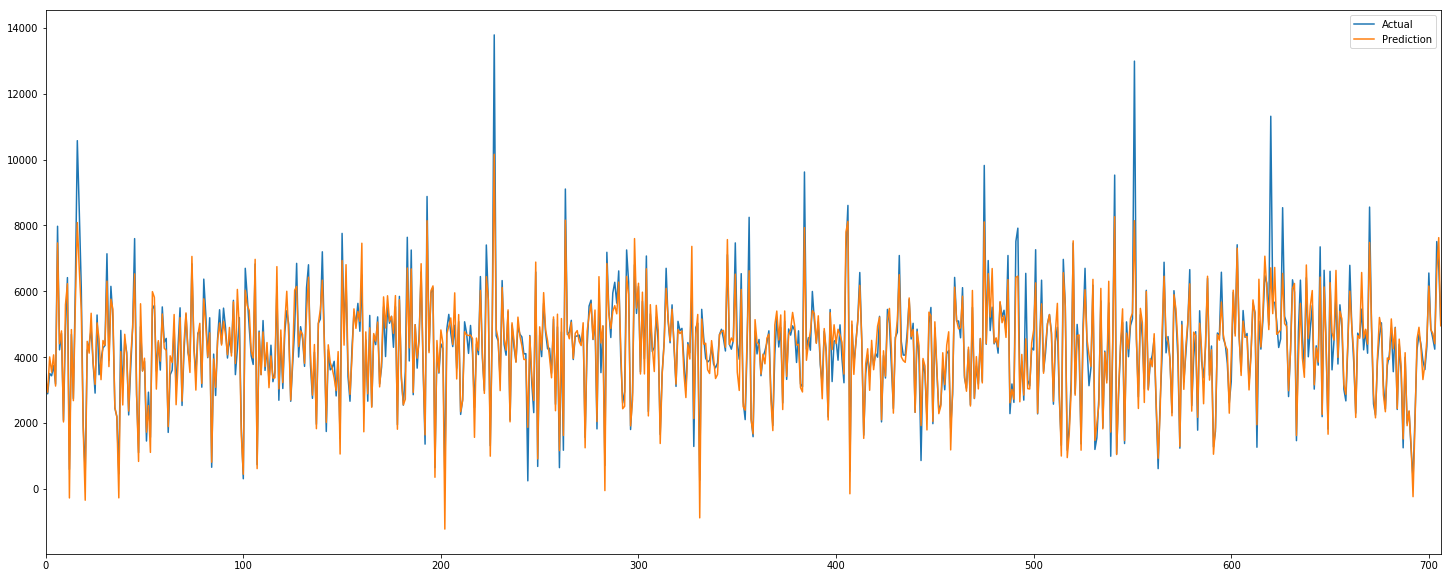

In [40]:
df1 = df.copy()
df1.reset_index(drop=True, inplace=True)
df1.plot(figsize=(25,10))

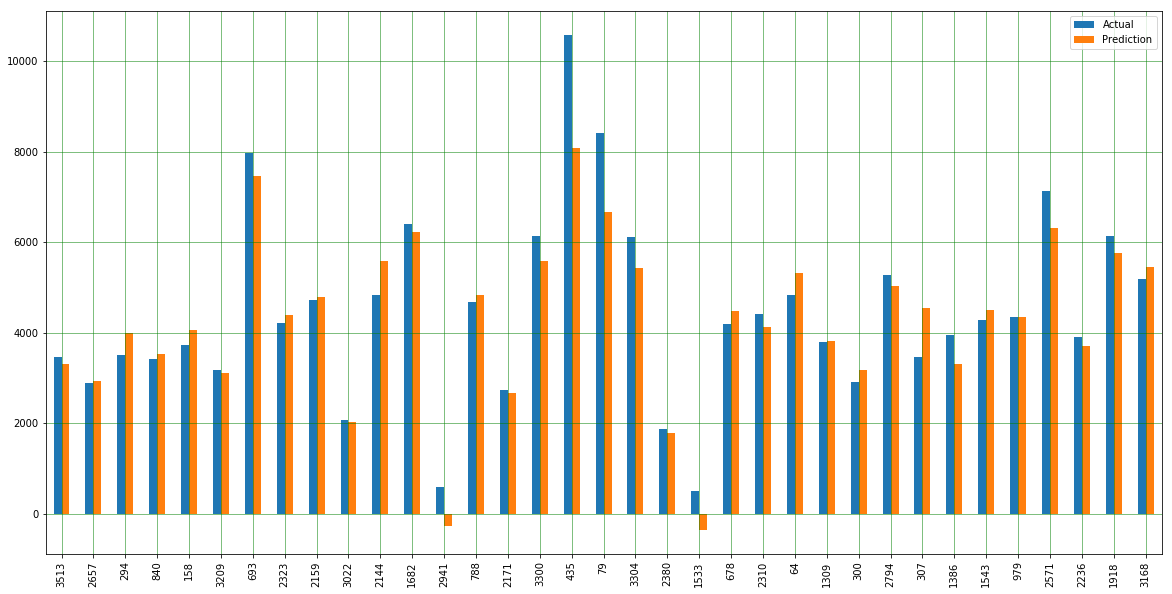

In [41]:
df2 = df.head(35)
df2.plot(kind="bar",figsize=(20,10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

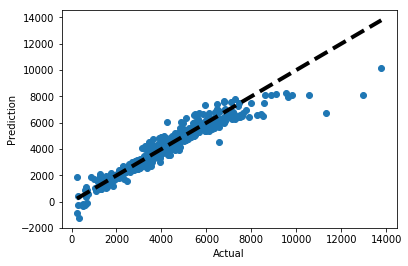

In [42]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
plt.show()

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 328.72596218881
Mean Squared Error: 278652.95934508985
Root Mean Squared Error: 527.8758938851914


In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9007639331042064

In [45]:
percent_diff = np.abs(y_pred - y_test) / y_test
result = (percent_diff < 0.2).sum() / len(y_test)
print('Percent within 20%% of target value: %.2f' % result)

Percent within 20% of target value: 0.92


## Top-10 tuoduimmat automallit

In [46]:
def mreg(df, automalli):
    malli = df[df["Malli"] == automalli]
    mallitarkennin = pd.get_dummies(malli["Mallin tarkennin"], drop_first=True)
    concated = pd.concat([malli, mallitarkennin], axis=1)
    X2 = concated.drop(["Merkki", "Malli", "Mallin tarkennin", "Verotusarvo", "Autovero"],1)
    y2 = concated["Autovero"]

    X_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
    regressor2 = LinearRegression()
    regressor2.fit(X_train2, y_train2)
    y_pred2 = regressor2.predict(x_test2)
    
    print(malli.Merkki.unique() ,automalli, "Autoveroennuste:")
    r2 = r2_score(y_test2, y_pred2)
    print("accuracy", r2)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
    
    df = pd.DataFrame({"Actual": y_test2, "Prediction": y_pred2})
    df2 = df.head(35)
    df2.plot(kind="bar",figsize=(20,10), title = automalli)
    plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
    plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

    
    fig, ax = plt.subplots()
    ax.scatter(y_test2, y_pred2)
    ax.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], "k--", lw=4)
    ax.set_xlabel("Actual")
    ax.set_title("Testi-vs-Ennnusteet")
    ax.set_ylabel("Prediction")
    plt.show()
    print("--------------------------------------------------------------------------------------------------------------")

In [47]:
top10_autot = verot.Malli.value_counts().head(10).index.tolist()

In [48]:
verot.drop(["Päätöspäivä", "Käyttöönottopvä"],1,inplace=True)
verot.dropna(inplace=True)

['VOLVO'] V70 Autoveroennuste:
accuracy 0.8994786227815762
Mean Absolute Error: 425.615981890691
Mean Squared Error: 399444.56207112956
Root Mean Squared Error: 632.0162672519826


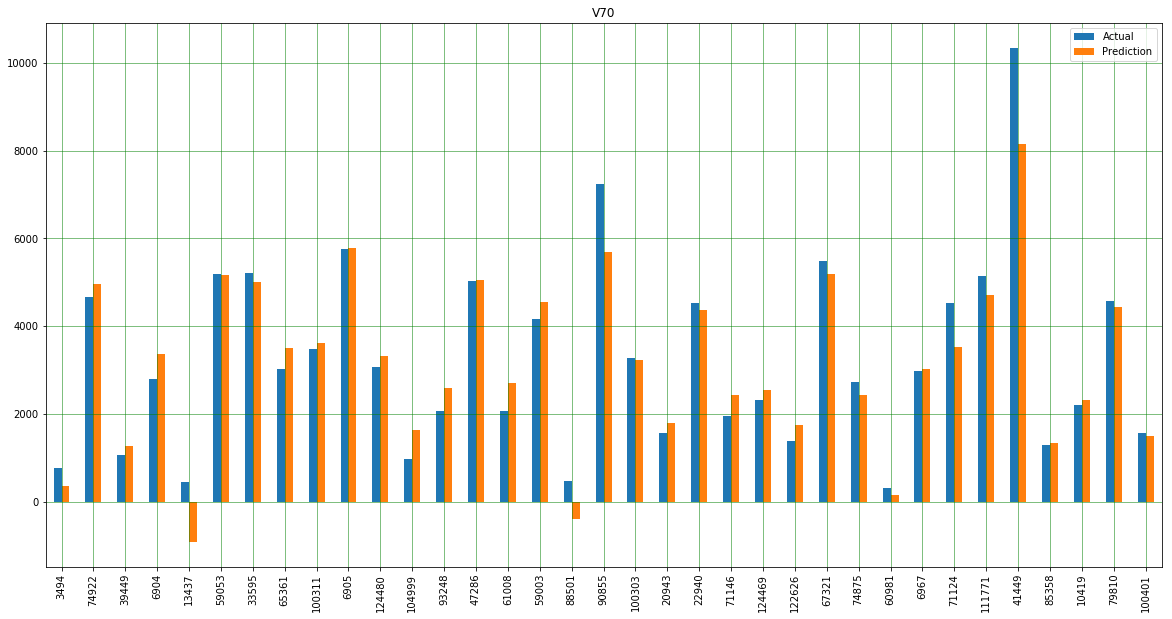

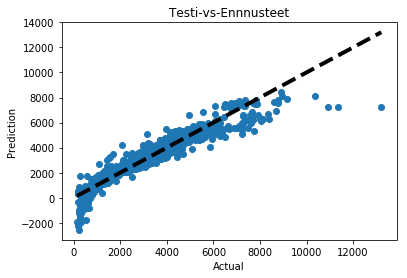

--------------------------------------------------------------------------------------------------------------
['MERCEDES-BENZ'] C 220 Autoveroennuste:
accuracy 0.9312638304895384
Mean Absolute Error: 302.5054710558552
Mean Squared Error: 169273.90169008065
Root Mean Squared Error: 411.42909679564553


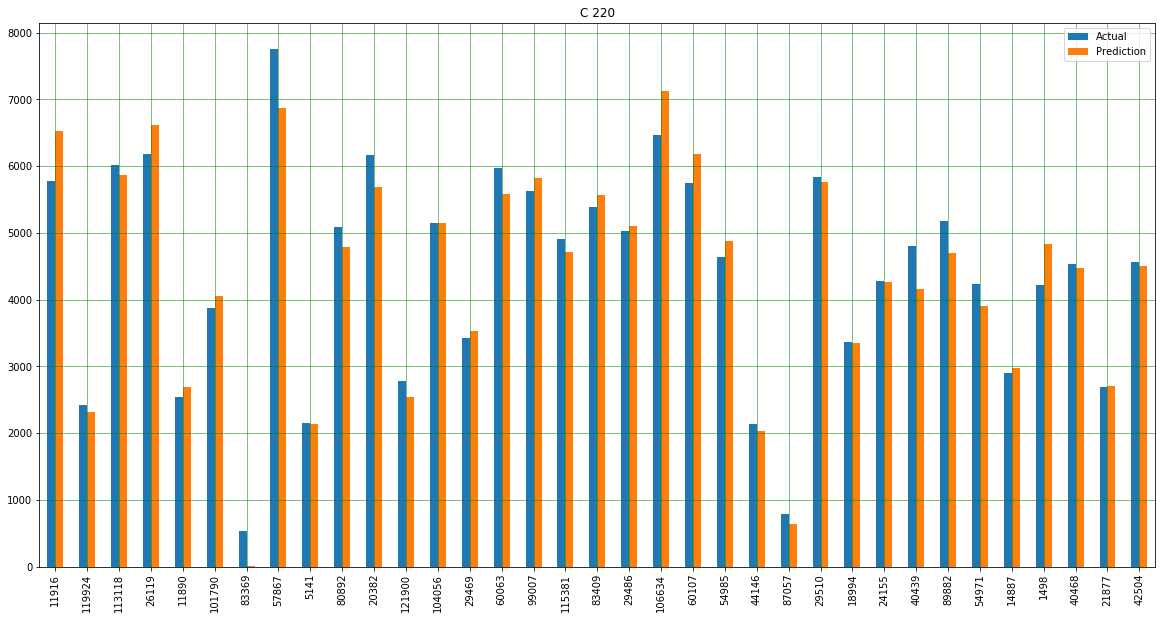

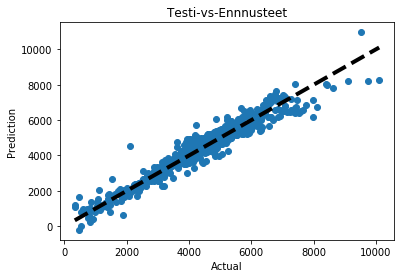

--------------------------------------------------------------------------------------------------------------
['VOLKSWAGEN'] PASSAT Autoveroennuste:
accuracy -910392960869924.1
Mean Absolute Error: 4601480068.175388
Mean Squared Error: 3.412042521863924e+21
Root Mean Squared Error: 58412691445.12966


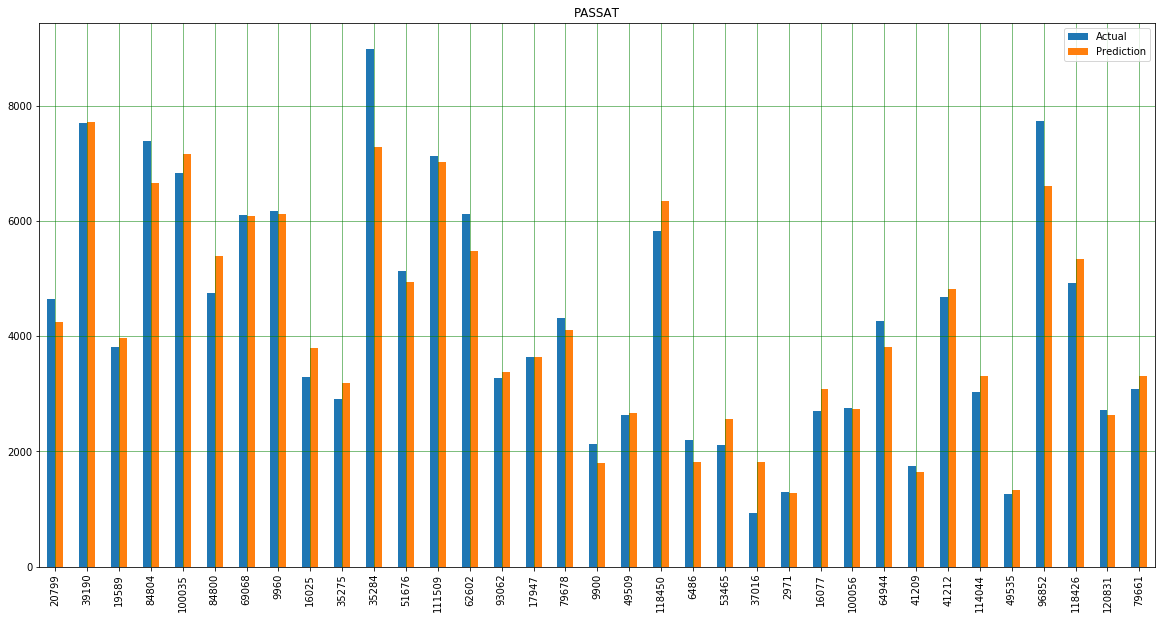

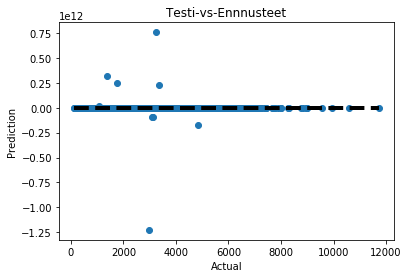

--------------------------------------------------------------------------------------------------------------
['AUDI'] A6 Autoveroennuste:
accuracy -6121987051773.923
Mean Absolute Error: 518326792.2138696
Mean Squared Error: 6.076478812473308e+19
Root Mean Squared Error: 7795177234.978887


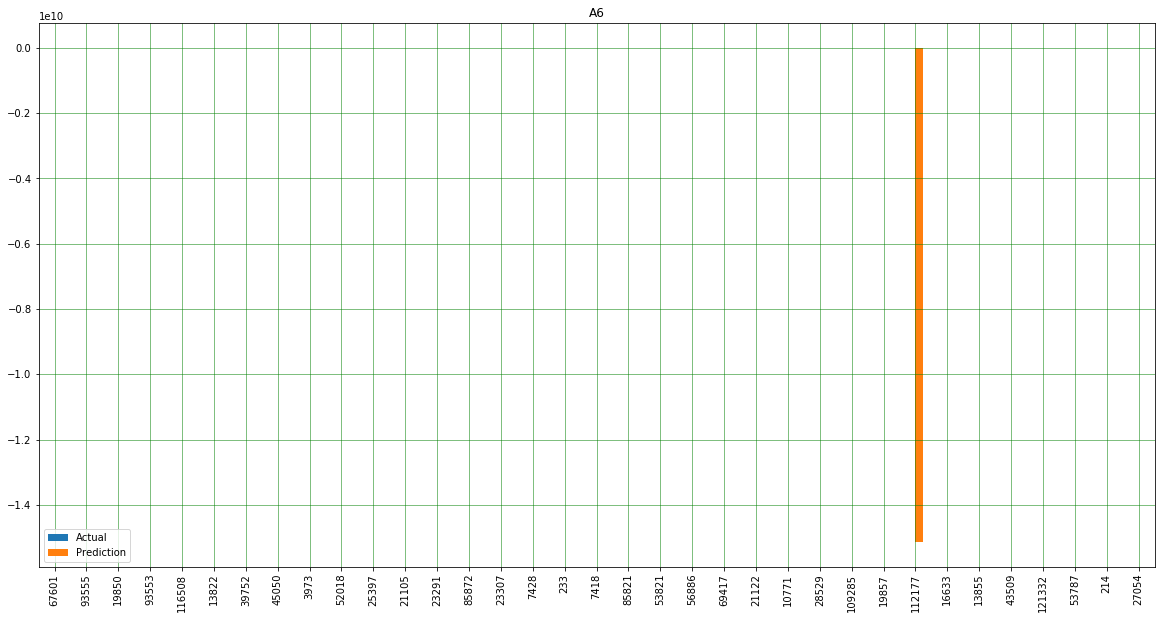

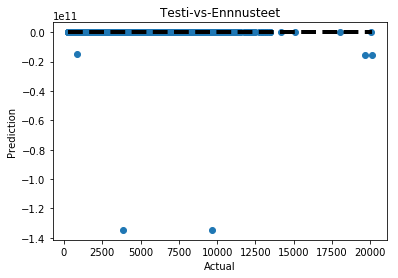

--------------------------------------------------------------------------------------------------------------
['AUDI'] A4 Autoveroennuste:
accuracy -2741877923847217.0
Mean Absolute Error: 4247935644.244217
Mean Squared Error: 9.464264945930286e+21
Root Mean Squared Error: 97284453773.09926


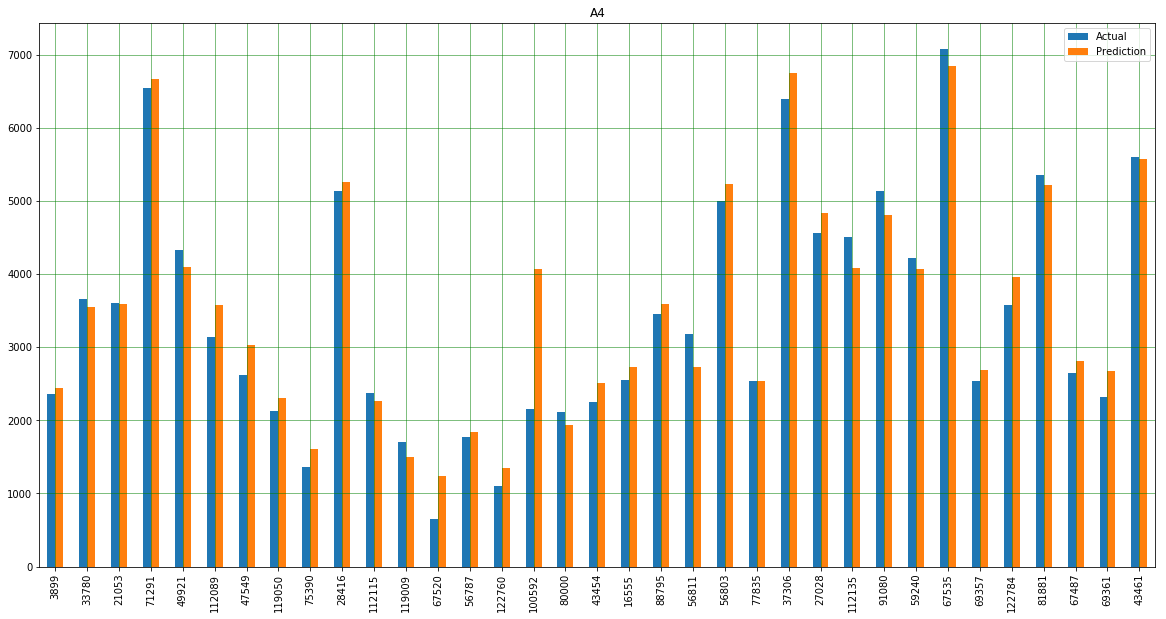

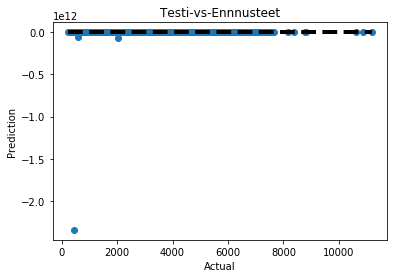

--------------------------------------------------------------------------------------------------------------
['MERCEDES-BENZ'] E 220 Autoveroennuste:
accuracy 0.8818832401178435
Mean Absolute Error: 597.5708738317143
Mean Squared Error: 694899.842983631
Root Mean Squared Error: 833.606527675756


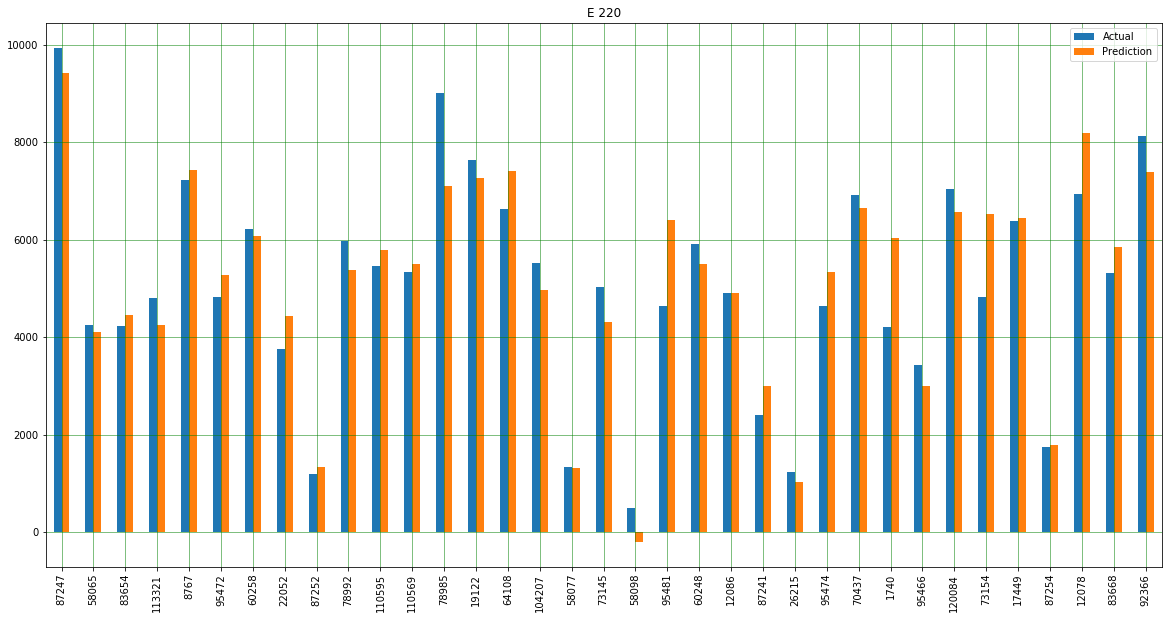

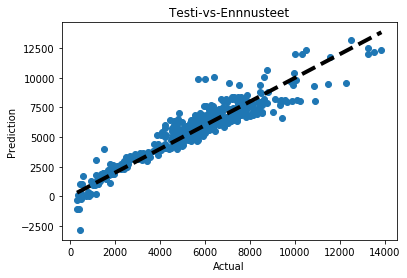

--------------------------------------------------------------------------------------------------------------
['BMW'] 320 Autoveroennuste:
accuracy 0.8515010361436127
Mean Absolute Error: 408.1457207162787
Mean Squared Error: 481593.05754153687
Root Mean Squared Error: 693.9690609397056


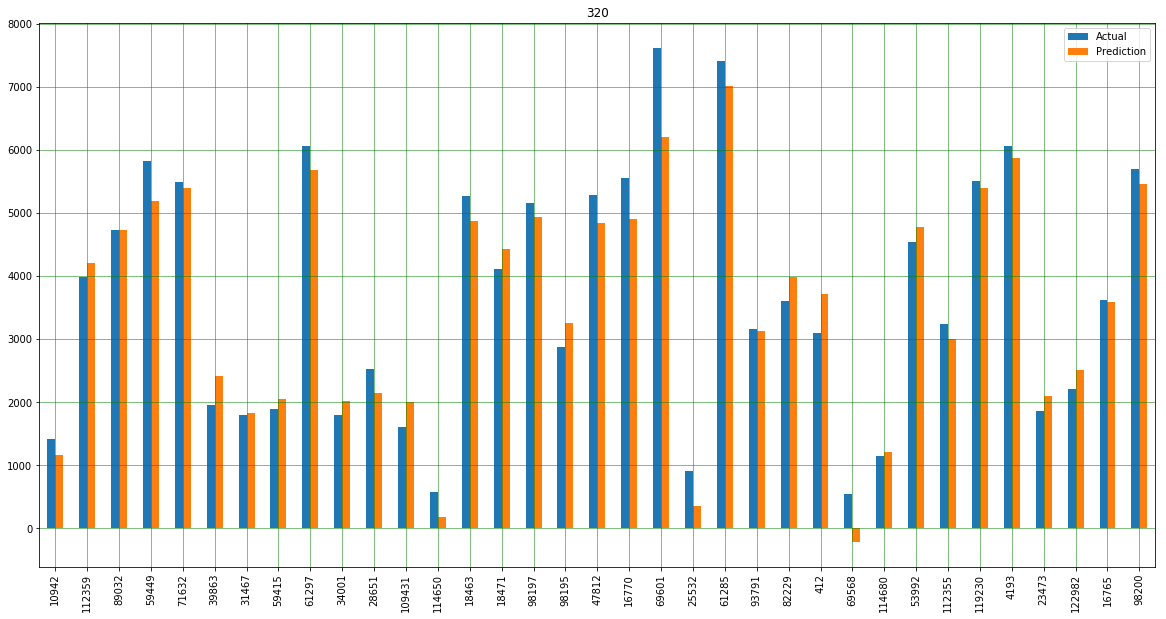

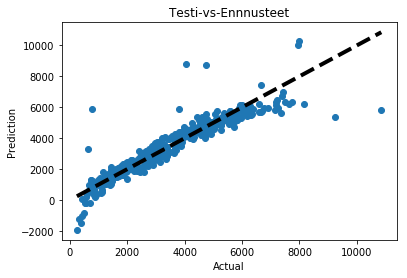

--------------------------------------------------------------------------------------------------------------
['BMW'] 530 Autoveroennuste:
accuracy 0.8768772402062314
Mean Absolute Error: 746.8270974225676
Mean Squared Error: 1565327.1618071066
Root Mean Squared Error: 1251.1303536430992


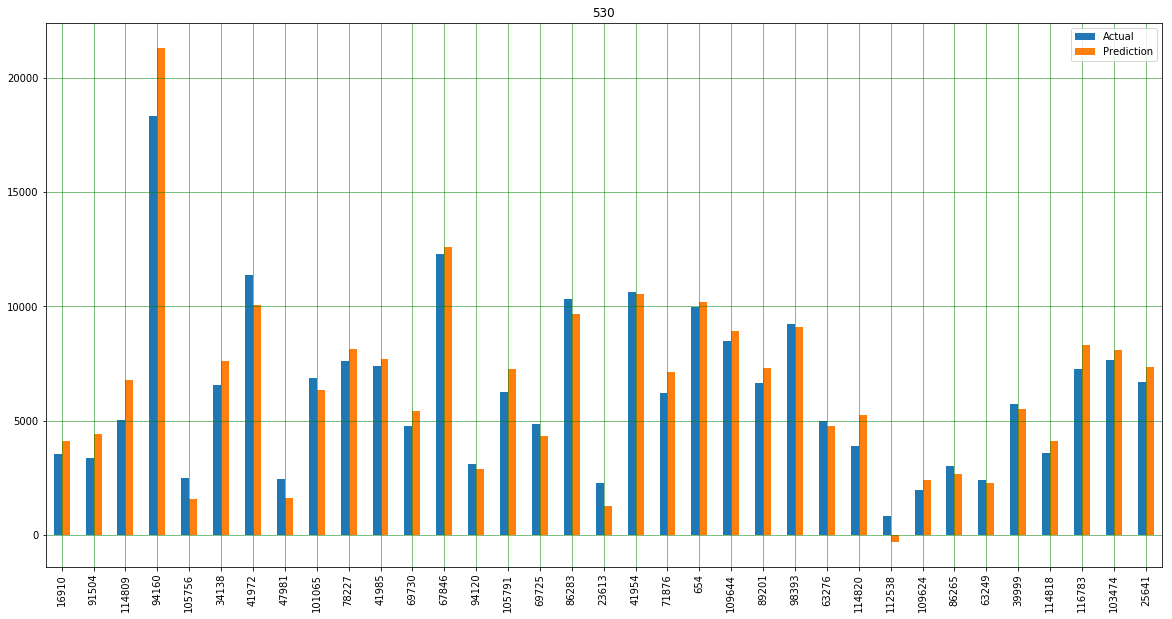

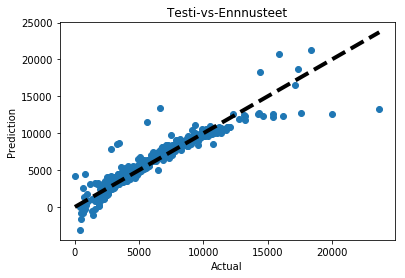

--------------------------------------------------------------------------------------------------------------
['VOLVO'] XC60 Autoveroennuste:
accuracy 0.8708751096091334
Mean Absolute Error: 500.44949135986025
Mean Squared Error: 598129.107138729
Root Mean Squared Error: 773.3880702071432


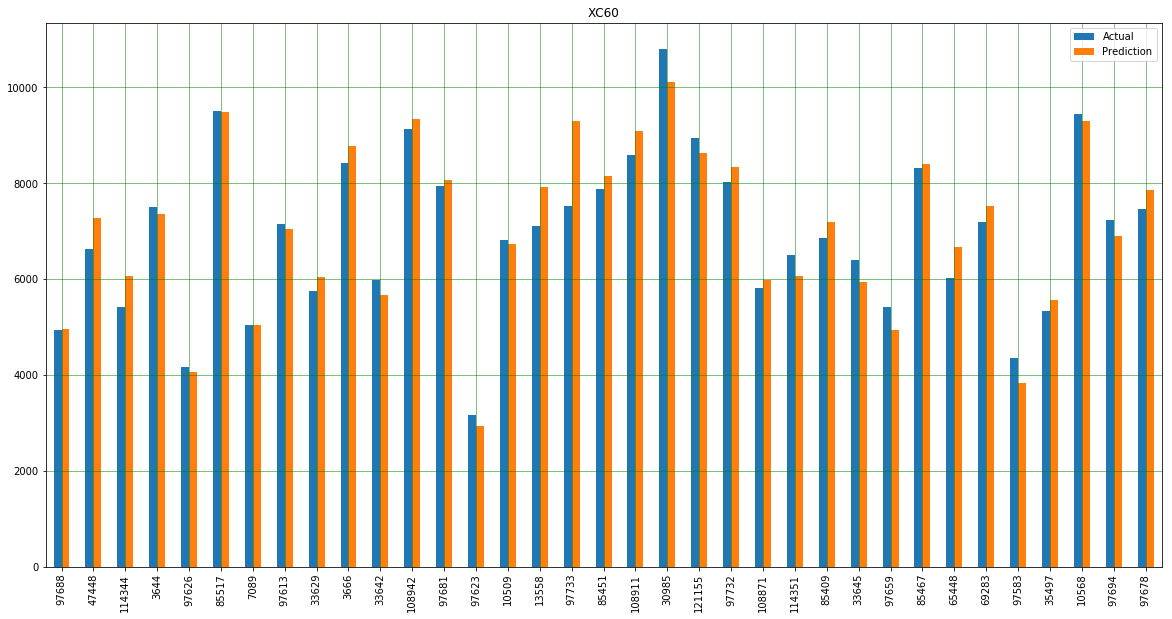

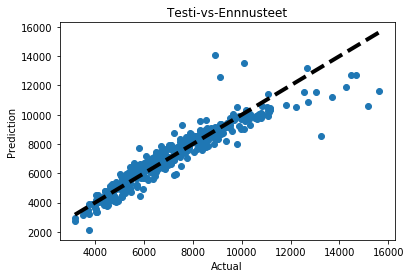

--------------------------------------------------------------------------------------------------------------
['MERCEDES-BENZ'] C 200 Autoveroennuste:
accuracy 0.9061646818525011
Mean Absolute Error: 313.04695049897794
Mean Squared Error: 328680.06897195574
Root Mean Squared Error: 573.3062610611851


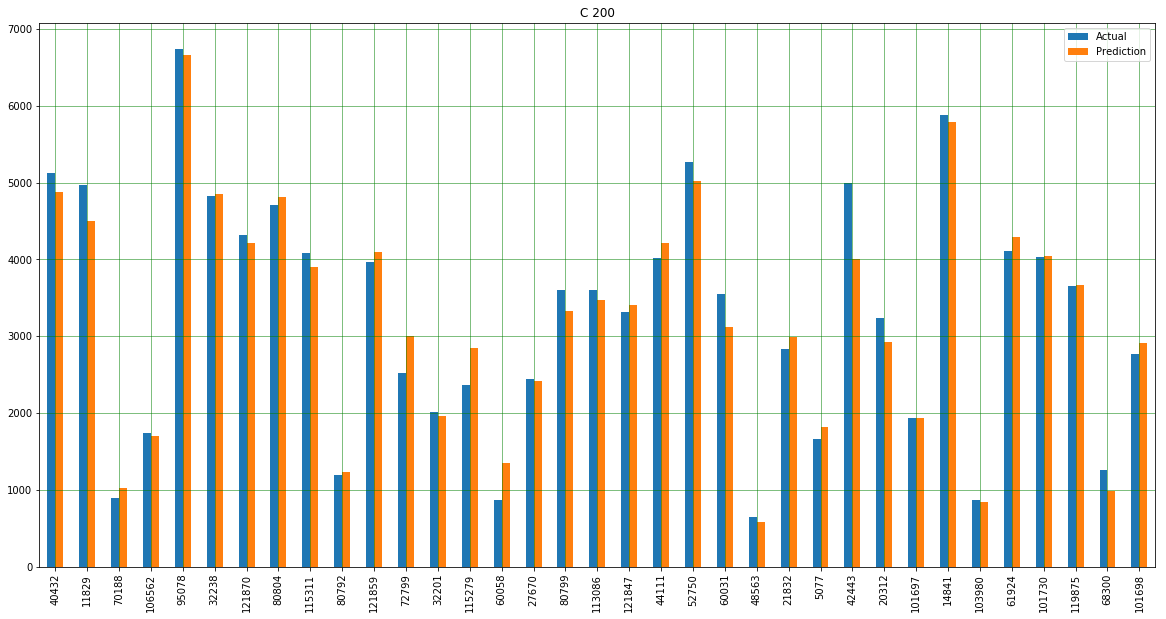

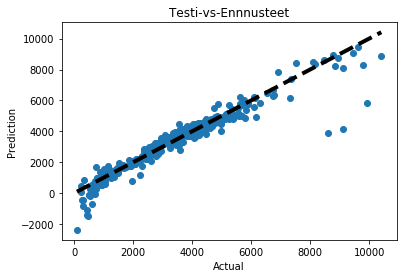

--------------------------------------------------------------------------------------------------------------


In [49]:
for i in top10_autot:
    mreg(verot, str(i))

## 3D mutlivariate regression

/home/h8953/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


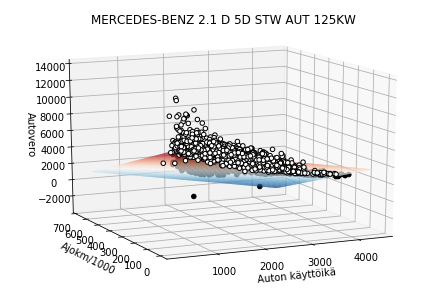

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
#%matplotlib notebook

X = tuoduin_malli_tarkennin[['ika', 'Ajokm/1000']]
y = tuoduin_malli_tarkennin['Autovero']


X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.ika.min(), X.ika.max(), 100), 
                       np.linspace(X['Ajokm/1000'].min(), X['Ajokm/1000'].max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2


fig = plt.figure()
ax = Axes3D(fig, azim=-115, elev=15)


surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.9, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].ika, X[resid >= 0]['Ajokm/1000'], y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].ika, X[resid < 0]['Ajokm/1000'], y[resid < 0], color='black', alpha=1.0)


ax.set_xlabel("Auton käyttöikä")
ax.set_ylabel("Ajokm/1000")
ax.set_zlabel("Autovero")
ax.set_title("MERCEDES-BENZ 2.1 D 5D STW AUT 125KW")
plt.show(fig)

In [57]:
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode()

X = tuoduin_malli_tarkennin[['ika', 'Ajokm/1000']]
y = tuoduin_malli_tarkennin['Autovero']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
xx1, xx2 = np.meshgrid(np.linspace(X.ika.min(), X.ika.max(), 100), 
                       np.linspace(X['Ajokm/1000'].min(), X['Ajokm/1000'].max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

surface = go.Surface(
    x = xx1,
    y = xx2,
    z = Z,
    showscale = False,
    colorscale = "Greys",
    opacity = 0.9
)

resid = y - est.predict(X)

trace = go.Scatter3d(
    x = X[resid >= 0].ika,
    y = X[resid >= 0]['Ajokm/1000'],
    z = y[resid >= 0],
    mode = "markers",
    marker = dict(size = 2, color = "white", opacity = 1, line = dict(color = "black", width = 0.2))
)

trace2 = go.Scatter3d(
    x = X[resid < 0].ika,
    y = X[resid < 0]['Ajokm/1000'],
    z = y[resid < 0],
    mode = "markers",
    marker = dict(size = 2, color = "black", opacity = 1)
)




layout = go.Layout(
    title="MERCEDES-BENZ 2.1 D 5D STW AUT 125KW",
    scene = dict(
        xaxis = dict(title = "Auton käyttöikä",
                    backgroundcolor="rgb(200, 200, 230)",
                    gridcolor="rgb(255, 255, 255)",
                    showbackground=True,
                    zerolinecolor="rgb(255, 255, 255)"
                ),
        
        yaxis = dict(title = "Ajokm/1000",
                    backgroundcolor="rgb(200, 200, 230)",
                    gridcolor="rgb(255, 255, 255)",
                    showbackground=True,
                    zerolinecolor="rgb(255, 255, 255)"
                ),
        zaxis = dict(title = "Autovero",
                    backgroundcolor="rgb(200, 200, 230)",
                    gridcolor="rgb(255, 255, 255)",
                    showbackground=True,
                    zerolinecolor="rgb(255, 255, 255)",
                    
                ),
    ),
    width = 900,
    height = 900,
    autosize = False,
    showlegend = False
)

data = [surface, trace, trace2]

figure = dict(data = data, layout = layout)
offline.iplot(figure)